<a href="https://colab.research.google.com/github/gkontorousis/ECSE326-project-group4/blob/master/Mini_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import scipy
import pandas as pd
import random
import time

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
path ='/content/drive/My Drive/Colab Notebooks/ML/'

housing = pd.read_csv(path + 'boston.csv')

wine = pd.read_csv(path + 'wine.csv', header = None)

## Task 1: Data Preprocessing

In [55]:
print(wine.shape,
housing.shape)

(178, 14) (506, 14)


In [56]:
print(housing.isna().sum()) # isna checks if any data is missing, and sum counts the number of missing values in each column

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [57]:
print(wine.isna().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64


In [58]:
#print(pd.to_numeric(housing[i], 'raise') for i in range (1))

In [59]:
housing.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [60]:
wine.dtypes

0       int64
1     float64
2     float64
3     float64
4     float64
5       int64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13      int64
dtype: object

In [61]:
del housing['B']
housing.shape

(506, 13)

In [62]:
print(housing.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std     28.148861    2.1057

In [63]:
print(wine.describe())

               0           1           2           3           4           5   \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

               6           7           8           9           10          11  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     2.295112    2.029270    0.361854    1.590899    5.058090    0.957449   
std      0.625851    0.9988

In [64]:
def normalize(X, i): # i is the index of the true value column
  rand_ind = np.random.choice(X.shape[0], X.shape[0], replace = False) # makes an array of n indices from 0 to N
  X = X[rand_ind]
  Y = X[:,i]
  X = (X-np.mean(X, 0))/(np.std(X, 0))
  X[:,i] = Y

  return (X)

def normalize2(data, true_value_col_index):
  rand_ind = np.random.choice(data.shape[0], data.shape[0], replace = False)
  X = data[rand_ind]
  Y = data[:,true_value_col_index]
  X = (data/data.max(0))
  X[:,true_value_col_index] = Y
  return (X)

housing_norm1 = normalize(housing.values, -1)
wine_norm1 = normalize(wine.values, 0)

housing_pd = pd.DataFrame(housing_norm1)
wine_pd = pd.DataFrame(wine_norm1)

print ('Normalized Housing Data \n', housing_pd.describe(), '\n')
print ('Normalized Wine Data \n', wine_pd.describe())

Normalized Housing Data 
                  0             1             2             3             4   \
count  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02   
mean  -1.685082e-16  2.194117e-18 -8.021690e-16 -1.755293e-17 -2.113373e-15   
std    1.000990e+00  1.000990e+00  1.000990e+00  1.000990e+00  1.000990e+00   
min   -4.197819e-01 -4.877224e-01 -1.557842e+00 -2.725986e-01 -1.465882e+00   
25%   -4.109696e-01 -4.877224e-01 -8.676906e-01 -2.725986e-01 -9.130288e-01   
50%   -3.906665e-01 -4.877224e-01 -2.110985e-01 -2.725986e-01 -1.442174e-01   
75%    7.396560e-03  4.877224e-02  1.015999e+00 -2.725986e-01  5.986790e-01   
max    9.933931e+00  3.804234e+00  2.422565e+00  3.668398e+00  2.732346e+00   

                 5             6             7             8             9   \
count  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02   
mean  -2.643472e-15 -6.740326e-16  1.590296e-15  4.914821e-17 -7.021173e-18   
std    1.000990e+00  1.00

In [65]:
housing_norm2 = normalize2(housing.values, -1)
wine_norm2 = normalize2(wine.values, 0)

housing_pd2 = pd.DataFrame(housing_norm2)
wine_pd2 = pd.DataFrame(wine_norm2)

print ('Normalized Housing Data \n', housing_pd2.describe(), '\n')
print ('Normalized Wine Data \n', wine_pd2.describe())

Normalized Housing Data 
                0           1           2           3           4           5   \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     0.040612    0.113636    0.401470    0.069170    0.636849    0.715790   
std      0.096672    0.233225    0.247309    0.253994    0.133040    0.080025   
min      0.000071    0.000000    0.016583    0.000000    0.442021    0.405581   
25%      0.000922    0.000000    0.187094    0.000000    0.515499    0.670330   
50%      0.002883    0.000000    0.349315    0.000000    0.617681    0.707118   
75%      0.041327    0.125000    0.652487    0.000000    0.716418    0.754385   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               6           7           8           9           10          11  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     0.685749    0.312954    0.397892    0.574173    0.838888    0.333238   
s

## Task 2: Model Implementation

### Linear Regression

In [66]:
# Simplify
def bias(X):

  bias = np.ones((X.shape[0],1))

  y = np.hstack((bias, X))
  return(y)


class LinReg():
    def __init__(self, data, verbose = True):
        self.X = data
        self.trainingTime = 0         # holds the training time of the last run of self.fit()
        self.verbose = verbose        # used for logging to stdout

    def log(self, message):
      if self.verbose:
        print(message)

    def getModelType(self, batch_size):
      if batch_size == self.X.shape[0]:
        return "GD"
      elif batch_size == 0:
        return "Analytical"
      else:
        return "SGD"

    def fit(self, batch_size = 0, lr = 0.1, type = 0):
      '''Performs the linear modelling of the data this instance of LinReg is initialized with.
      If type = 0 then it performs analytical linear regression
      If type = 1 then it performs lineare regression with GD
      If type = 2 then it performs linear regression with SGD'''

      X = self.X[:, 0:-1]
      X = bias(X)

      Y = self.X[:, -1]

      if batch_size == 0 and type == 0: # solve for w using w = (X_T@X)^-1X_T@y
        start_time = time.time()
        self.w = np.linalg.solve(X.T@X,X.T@Y) # From linear Regression notes, X.T@X@w = X.T@Y which is in the form Aw = b, use linalg to solve it so we avoid taking the inverse
        end_time = time.time()
        elapsed_time = (end_time - start_time)  * 1000
        self.trainingTime = elapsed_time
        self.log(f"[Analytical] Training time: {elapsed_time} ms.\n")
        return (self.w)

      else: # (Stochastic) Gradient descent
        # if the batch size is equal to the shape of the data, then it effectively computes
        # the simple gradient descent, as all of the data is selected
        n = batch_size if type != 1 else X.shape[0]
        N = X.shape[0]
        w = np.zeros(X.shape[1]) # We know x has 13 features, but this is more general
        g = np.inf
        i = 0
        error_history = []
        start_time = time.time()
        while np.linalg.norm(g) > 1e-2 and i < 1000000:
          rand_ind = np.random.choice(N, n, replace = False) # makes an array of n indices from 0 to N
          x = X[rand_ind] #creates a new matrix using the random indices
          y = Y[rand_ind]
          yh = np.dot(x,w)
          g = np.dot(x.T, yh - y)/n
          w = w - lr*g
          i += 1
          error = np.mean((yh - y) ** 2)
          error_history.append(error)
        end_time = time.time()
        elapsed_time = end_time - start_time
        self.w = w

        if (type == 1):
          self.log("Running linear regression with GD")
        else:
          self.log(f"Running linear regression with SGD with batch size {n}")
        self.log(f"Learning rate {lr} | Training time: {elapsed_time} ms")
        self.log(f"Converged to a MSE of {error} in {i} iterations.")
        if (self.verbose):
          plt.plot(error_history)
          plt.xlabel("Iterations")
          plt.ylabel("Mean Squared Error [MSE]")
          plt.title("MSE vs. Iterations")
          plt.show()
        return (self.w)


    def predict(self, X, w):
      # We want to predict the median value.
      X = bias(X[:, 0:-1])
      y = np.dot(X,w)
      return(y)

    def error(self, test_set = None, batch_size = 0, lr = 0.1):
      if test_set is None:
        test_set = self.X

      true_val = test_set[:, -1]
      predicted = self.predict(test_set, batch_size, lr)

      return (true_val - predicted)

### Logistic Regression

In [67]:
def softmax(logits):
    # Subtract the maximum value along the specified axis for numerical stability
    max_logits = np.max(logits, axis=1, keepdims=True)
    shifted_logits = logits - max_logits

    # Compute the softmax probabilities along the specified axis
    exp_logits = np.exp(shifted_logits)
    softmax_probs = exp_logits / np.sum(exp_logits, axis=1, keepdims=True)

    return softmax_probs


class LogReg():

  def __init__(self, data):
    self.X = data
    self.row = data.shape[0]
    self.col = data.shape[1]

  def fit(self, batch_size = 0, lr = 0.1):
    X = self.X[:, 1:]
    X = bias(X)

    Y = self.X[:, 0]
    y = np.zeros((self.row, 3))
    y[np.arange(self.row), Y.astype(int) - 1] = 1 # Sets category 1 as [1,0,0], 2 as [0,1,0] and 3 as [0,0,1]


    if batch_size == 0:
      batch_size = self.row

    w = np.random.rand(X.shape[1], 3)
    start_time = time.time()
    g = np.inf
    count = 0
    while np.linalg.norm(g) > 1e-3 and count < 1000000:
      rand_ind = np.random.choice(self.row, batch_size, replace = False) # makes an array of n indices from 0 to N
      x = X[rand_ind] #creates a new matrix using the random indices
      y_batch = y[rand_ind]
      z = np.dot(x,w)
      yh = softmax(z)

      g = np.dot(x.T, yh - y_batch)/batch_size
      w = w - lr*g
      count += 1

    end_time = time.time()
    elapsed_time = end_time - start_time

    print(f"[GD with batch size {batch_size} and learning rate {lr}] Training time: {elapsed_time} seconds.\nConverged in {count} iterations.\n")
    return (w)


  def predict(self, X, w):
      X = X[:, 1:]
      X = bias(X)
      z = np.dot(X,w)
      yh = softmax(z)
      y = np.argmax(z,1)+1
      return (y)

  def error(self, X, w):
    true_val = X[:, 0]
    predicted = self.predict(X, w)
    return (true_val - predicted)


## Task 3: Experiments

###3.1 80/20 Train/Test Split

#### 3.1.1 Linear Regression

In [68]:
#Split housing dataset into an 80/20 training and testing set
n = int(housing.shape[0]//(1/0.8))
housing_train = housing_norm2[0:n]
housing_test = housing_norm2[n:]
house = LinReg(housing_train)

[Analytical] Training time: 2.9947757720947266 ms.

Running linear regression with SGD with batch size 404
Learning rate 0.1 | Training time: 2.3156137466430664 ms
Converged to a MSE of 22.843709776875333 in 9546 iterations.


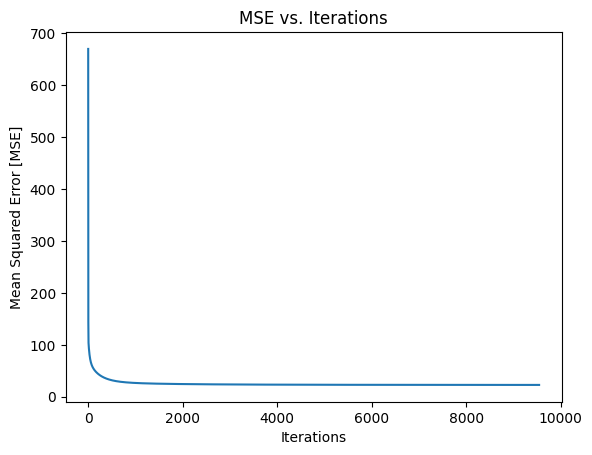

In [69]:
# Training the model
analytical_model = house.fit();
gd_model = house.fit(n, 0.1)

In [70]:
# Metrics for Linear Regression

def mae(true, pred):
    n = len(true)
    abs_errors = [np.abs(true - pred)]
    mae = np.sum(abs_errors) / n
    return mae

def mse(true, pred):
    n = len(true)
    squared_errors = [(true - pred)**2]
    mse = np.sum(squared_errors) / n
    return mse

def rmse(true, pred):
    n = len(true)
    squared_errors = [(true - pred)**2]
    rmse = np.sqrt(np.sum(squared_errors) / n)
    return rmse

#---------------- MAE ------------------------------------------------------------
analytical_mae_train = mae(housing_train[:, -1], house.predict(housing_train, analytical_model))
analytical_mae_test = mae(housing_test[:, -1], house.predict(housing_test, analytical_model))

gd_mae_train = mae(housing_train[:, -1], house.predict(housing_train, gd_model))
gd_mae_test = mae(housing_test[:, -1], house.predict(housing_test, gd_model))

#---------------- MSE ------------------------------------------------------------
analytical_mse_train = mse(housing_train[:, -1], house.predict(housing_train, analytical_model))
analytical_mse_test = mse(housing_test[:, -1], house.predict(housing_test, analytical_model))

gd_mse_train = mse(housing_train[:, -1], house.predict(housing_train, gd_model))
gd_mse_test = mse(housing_test[:, -1], house.predict(housing_test, gd_model))

#---------------- RMSE ------------------------------------------------------------

analytical_rmse_train = rmse(housing_train[:, -1], house.predict(housing_train, analytical_model))
analytical_rmse_test = rmse(housing_test[:, -1], house.predict(housing_test, analytical_model))

gd_rmse_train = rmse(housing_train[:, -1], house.predict(housing_train, gd_model))
gd_rmse_test = rmse(housing_test[:, -1], house.predict(housing_test, gd_model))

# Create a table
data = [["Metric", "Analytical (Train)", "Analytical (Test)", "GD (Train)", "GD (Test)"],
        ["MAE", analytical_mae_train, analytical_mae_test, gd_mae_train, gd_mae_test],
        ["MSE", analytical_mse_train, analytical_mse_test, gd_mse_train, gd_mse_test],
        ["RMSE", analytical_rmse_train, analytical_rmse_test, gd_rmse_train, gd_rmse_test]]

table = tabulate(data, headers="firstrow", tablefmt="fancy_grid")

# Print the table
print(table)

╒══════════╤══════════════════════╤═════════════════════╤══════════════╤═════════════╕
│ Metric   │   Analytical (Train) │   Analytical (Test) │   GD (Train) │   GD (Test) │
╞══════════╪══════════════════════╪═════════════════════╪══════════════╪═════════════╡
│ MAE      │              3.30727 │             4.57002 │      3.27463 │     4.54641 │
├──────────┼──────────────────────┼─────────────────────┼──────────────┼─────────────┤
│ MSE      │             22.7836  │            30.5565  │     22.8437  │    30.554   │
├──────────┼──────────────────────┼─────────────────────┼──────────────┼─────────────┤
│ RMSE     │              4.77322 │             5.5278  │      4.77951 │     5.52757 │
╘══════════╧══════════════════════╧═════════════════════╧══════════════╧═════════════╛


#### 3.1.2 Logistic Regression

In [71]:
#Split wine dataset into an 80/20 training and testing set
m = int(wine.shape[0]//(1/0.8))
wine_train = wine_norm2[0:m]
wine_test = wine_norm2[m:]
wine_model = LogReg(wine_train)

In [72]:
#Training the model
model = wine_model.fit()

[GD with batch size 142 and learning rate 0.1] Training time: 14.921810626983643 seconds.
Converged in 133781 iterations.



In [73]:
#Metrics for Logistic Regression
def accuracy(error):
  return(np.count_nonzero(error == 0)/error.shape[0])

def precision(true_val, predicted):
  T1 = np.sum((np.array(true_val) == 1) & (np.array(predicted) == 1))
  F1 = np.sum((np.array(true_val) != 1) & (np.array(predicted) == 1))

  p1 = T1/(T1 + F1)

  T2 = np.sum((np.array(true_val) == 2) & (np.array(predicted) == 2))
  F2 = np.sum((np.array(true_val) != 2) & (np.array(predicted) == 2))

  p2 = T2/(T2 + F2)

  T3 = np.sum((np.array(true_val) == 3) & (np.array(predicted) == 3))
  F3 = np.sum((np.array(true_val) != 3) & (np.array(predicted) == 3))

  p3 = T3/(T3 + F3)

  return(p1, p2, p3, (p1 + p2 + p3)/3)

def recall(true_val, predicted):

  T1 = np.sum((np.array(true_val) == 1) & (np.array(predicted) == 1))
  cat1 = np.count_nonzero(true_val == 1)

  r1 = T1/cat1

  T2 = np.sum((np.array(true_val) == 2) & (np.array(predicted) == 2))
  cat2 = np.count_nonzero(true_val == 2)

  r2 = T2/cat2

  T3 = np.sum((np.array(true_val) == 3) & (np.array(predicted) == 3))
  cat3 = np.count_nonzero(true_val == 3)

  r3 = T3/cat3

  return(r1, r2, r3, (r1+r2+r3)/3)

def F1(true_val, predicted):
    p1,p2,p3,p = precision(true_val, predicted)
    r1,r2,r3,r = recall(true_val, predicted)

    F1_1 = 2*p1*r1/(r1+p1)
    F1_2 = 2*p2*r2/(r2+p2)
    F1_3 = 2*p3*r3/(r3+p3)
    F1 = 2*p*r/(r+p)

    return(F1_1, F1_2, F1_3, F1)


acc_train = accuracy(wine_model.error(wine_train, model))
acc_test = accuracy(wine_model.error(wine_test, model))
print(f"Training Accuracy (%): {acc_train}")
print(f"Testing Accuracy (%): {acc_test}\n")

p1_train, p2_train, p3_train, pavg_train = precision(wine_train[:, 0], wine_model.predict(wine_train, model))
p1_test, p2_test, p3_test, pavg_test = precision(wine_test[:, 0], wine_model.predict(wine_test, model))
print(f"C1 Training Precision: {p1_train}, C2 Training Precision: {p2_train}, C3 Training Precision: {p3_train}, Average Training Precision: {pavg_train}")
print(f"C1 Testing Precision: {p1_test}, C2 Testing Precision: {p2_test}, C3 Testing Precision: {p3_test}, Average Testing Precision: {pavg_test}\n")

r1_train, r2_train, r3_train, ravg_train = recall(wine_train[:, 0], wine_model.predict(wine_train, model))
r1_test, r2_test, r3_test, ravg_test = recall(wine_test[:, 0], wine_model.predict(wine_test, model))
print(f"C1 Training Recall: {r1_train}, C2 Training Recall: {r2_train}, C3 Training Recall: {r3_train}, Average Training Recall: {ravg_train}")
print(f"C1 Testing Recall: {r1_test}, C2 Testing Recall: {r2_test}, C3 Testing Recall: {r3_test}, Average Testing Recall: {ravg_test}\n")

f1_train, f2_train, f3_train, favg_train = F1(wine_train[:, 0], wine_model.predict(wine_train, model))
f1_test, f2_test, f3_test, favg_test = F1(wine_test[:, 0], wine_model.predict(wine_test, model))
print(f"C1 Training F1-score: {f1_train}, C2 Training F1-score: {f2_train}, C3 Training F1-score: {f3_train}, Average Training F1-score: {favg_train}")
print(f"C1 Testing F1-score: {f1_test}, C2 Testing F1-score: {f2_test}, C3 Testing F1-score: {f3_test}, Average Testing F1-score: {favg_test}\n")

# Create a table using tabulate
table_data = [
    ["Metric", "Class 1", "Class 2", "Class 3", "Average"],
    ["Accuracy (%)", acc_train, "-", "-", "-"],
    ["", acc_test, "-", "-", "-"],
    ["Precision", p1_train, p2_train, p3_train, pavg_train],
    ["", p1_test, p2_test, p3_test, pavg_test],
    ["Recall", r1_train, r2_train, r3_train, ravg_train],
    ["", r1_test, r2_test, r3_test, ravg_test],
    ["F1-score", f1_train, f2_train, f3_train, favg_train],
    ["", f1_test, f2_test, f3_test, favg_test]
]

# Print the table
# print(tabulate(table_data, headers="firstrow", tablefmt="fancy_grid"))

Training Accuracy (%): 1.0
Testing Accuracy (%): 1.0

C1 Training Precision: 1.0, C2 Training Precision: 1.0, C3 Training Precision: 1.0, Average Training Precision: 1.0
C1 Testing Precision: nan, C2 Testing Precision: nan, C3 Testing Precision: 1.0, Average Testing Precision: nan

C1 Training Recall: 1.0, C2 Training Recall: 1.0, C3 Training Recall: 1.0, Average Training Recall: 1.0
C1 Testing Recall: nan, C2 Testing Recall: nan, C3 Testing Recall: 1.0, Average Testing Recall: nan

C1 Training F1-score: 1.0, C2 Training F1-score: 1.0, C3 Training F1-score: 1.0, Average Training F1-score: 1.0
C1 Testing F1-score: nan, C2 Testing F1-score: nan, C3 Testing F1-score: 1.0, Average Testing F1-score: nan



<ipython-input-73-8140c31ec34b>:9: RuntimeWarning: invalid value encountered in long_scalars
  p1 = T1/(T1 + F1)
<ipython-input-73-8140c31ec34b>:14: RuntimeWarning: invalid value encountered in long_scalars
  p2 = T2/(T2 + F2)
<ipython-input-73-8140c31ec34b>:28: RuntimeWarning: invalid value encountered in long_scalars
  r1 = T1/cat1
<ipython-input-73-8140c31ec34b>:33: RuntimeWarning: invalid value encountered in long_scalars
  r2 = T2/cat2


###3.2 Five-fold Cross-Validation

In [74]:
def five_fold_split(training_data):
  '''Returns a list of 5 tuples (training_set, validation_set) each for every fold chosen as the validation fold'''
  m = training_data.shape[0]

  m = n // 5*4
  test = data[m:]

  training = data[:m]
  j = m // 5

  set1, set2, set3, set4, set5 = training[:j], training[j:2*j], training[2*j:3*j], training[3*j:4*j], training[4*j:5*j]

  t1, v1 = np.vstack((set1, set2, set3, set4)), set5
  t2, v2 = np.vstack((set1, set2, set3, set5)), set4
  t3, v3 = np.vstack((set1, set2, set4, set5)), set3
  t4, v4 = np.vstack((set1, set3, set4, set5)), set2
  t5, v5 = np.vstack((set2, set3, set4, set5)), set1

  folds = [(t1, v1), (t2, v2), (t3, v3), (t4, v4), (t5, v5)]

  return folds

def train_test_split(data):
  '''Splits the data into a 80/20 train/test split.
  Returns a tuple (train, test) of the two data set splits'''

  n = data.shape[0]
  m = n // 5 * 4

  test = data[m:]
  training = data[:m]

  return training, test



In [77]:
def five_fold_linreg(data, type=0, lr=0.1, batch_size=0):
  '''Performs five-fold cross validation with the given learning rate.
  Returns a tuple (metrics, avg_mse) where avg_mse := average mean squared error and metrics is a pandas Dataframe with all the metrics for this run

  Data: The data to use for performing five-fold cross-validation. Expected to be normalized

  Type: used to choose between analytical linear regression (0), linear regression with GD (1)
    and linear regression with SGD (2)

  lr: learning rate, used only when performing linear regression with GD


  '''

  training_data, test_data = train_test_split(data)
  five_folds = five_fold_split(training_data)

  Mae = np.zeros(5)
  Mse = np.zeros(5)
  Rmse = np.zeros(5)
  Std = np.zeros(5)
  Max = np.zeros(5)
  trainingTimes = np.zeros(5)

  if (type not in [0, 1, 2]):
    raise ValueError("Invalid type provided! Analytical (0), GD (1) or SGD (2) are allowed")
  elif (type == 2 and batch_size == 0):
    raise ValueError("Cannot perform SGD with a batch size of 0!")
  for i in range(len(five_folds)):
    training_set, validation_set = five_folds[i]
    regression = LinReg(training_set, False)
    w = regression.fit(batch_size=batch_size, lr=lr, type=type)
    yh = regression.predict(validation_set, w)
    y = validation_set[:,-1]

    Mae[i] = mae(y, yh)
    Mse[i] = mse(y, yh)
    Rmse[i] = rmse(y, yh)
    Std[i] = np.std(y-yh)
    Max[i] = np.max(y-yh)
    trainingTimes[i] = regression.trainingTime

  print(Mae)

  avg_mae = np.mean(Mae)
  avg_mse = np.mean(Mse)
  avg_rmse = np.mean(Rmse)
  avg_std = np.mean(Std)
  avg_max = np.mean(Max)
  avg_training_times = np.mean(trainingTimes)

  metrics = np.hstack((np.arange(1, 6).reshape((5, 1)), Mae.reshape(5,1), Mse.reshape(5,1), Rmse.reshape(5,1), Std.reshape(5,1), Max.reshape(5,1), trainingTimes.reshape(5, 1)))
  metrics = np.vstack((metrics, ['Means of Folds', avg_mae, avg_mse, avg_rmse, avg_std, avg_max, avg_training_times]))

  df_metrics = pd.DataFrame(metrics, columns=['#Fold', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'Standard Deviation of the Error', 'Maximum Error', 'Training Time'])

  return df_metrics, avg_mse


In [78]:
# Analytical linreg
results, _ = five_fold_linreg(housing_norm2, type=0, lr=0.1)
print("Performing Five-Fold Cross-Validation for Analytical Linear Regression")
print(tabulate(results, headers='keys', tablefmt="fancy_grid"))
print(f"\n\n")

# GD linreg
results, _ = five_fold_linreg(housing_norm2, type=1, lr=0.1)
print(f"Performing Five-Fold Cross-Validation for Linear Regression with GD with Learning Rate = {0.1}")
print(tabulate(results, headers='keys', tablefmt="fancy_grid"))

ValueError: ignored

In [ ]:
def logistic_validation(data, batch_size, lr):
  batch, fold, j = split(data, 0)

  acc = np.zeros(5)
  pre = np.zeros(5)
  pre1 = np.zeros(5)
  pre2 = np.zeros(5)
  pre3 = np.zeros(5)
  rec = np.zeros(5)
  rec1 = np.zeros(5)
  rec2 = np.zeros(5)
  rec3 = np.zeros(5)
  f1 = np.zeros(5)
  f1_1 = np.zeros(5)
  f1_2 = np.zeros(5)
  f1_3 = np.zeros(5)

  for i in range (5):
    training_set = batch[i*fold: (i+1)*fold - j]
    validation_set = batch[(i+1)*fold - j: (i+1)*fold]

    regression = LogReg(training_set)
    w = regression.fit(batch_size, lr)
    yh = regression.predict(validation_set, w)
    y = validation_set[:,0]

    acc[i] = accuracy(y-yh)
    pre1[i], pre2[i], pre3[i], pre[i] = precision(y, yh)
    rec1[i],rec2[i], rec3[i], rec[i] = recall(y, yh)
    f1_1[i], f1_2[i], f1_3[i], f1[i]  =  F1(y, yh)

    avg_acc = np.mean(acc)
    avg_pre1 = np.mean(pre1)
    avg_pre2 = np.mean(pre2)
    avg_pre3 = np.mean(pre3)
    avg_pre = np.mean(pre)
    avg_rec1 = np.mean(rec1)
    avg_rec2 = np.mean(rec2)
    avg_rec3 = np.mean(rec3)
    avg_rec = np.mean(rec)
    avg_f1_1 = np.mean(f1_1)
    avg_f1_2 = np.mean(f1_2)
    avg_f1_3 = np.mean(f1_3)
    avg_f1 = np.mean(f1)

  #metrics = np.hstack((acc.reshape(5,1), pre1.reshape(5,1), pre2.reshape(5,1), pre3.reshape(5,1),pre.reshape(5,1), rec1.reshape(5,1), rec2.reshape(5,1), rec3.reshape(5,1), rec.reshape(5,1), f1_1.reshape(5,1), f1_2.reshape(5,1), f1_3.reshape(5,1), f1.reshape(5,1)))

  #Metrics = pd.DataFrame(metrics, columns=['Accuracy', 'Precision Category 1', 'Precision Category 2', 'Precision Category 3', 'Average Precision', 'Recall Category 1', 'Recall Category 2', 'Recall Category 3', 'Average Recall', 'F1-Score Category 1', 'F1-Score Category 2', 'F1-Score Category 3', 'Average F1-Score'])

  print (f'Logistic Regression Performance for a Batch Size of {batch_size}, and a Learning Rate of {lr} \n')
  print (f'The Average Accuracy is: {avg_acc}\n')
  print (f'The Average Precision in Category 1 is: {avg_pre1}\n')
  print (f'The Average Precision in Category 2 is:{avg_pre2}\n')
  print (f'The Average Precision in Category 3 is: {avg_pre3}\n')
  print (f'The Average Mean Precision is: {avg_pre}\n')
  print (f'The Average Recall in Category 1 is: {avg_rec1}\n')
  print (f'The Average Recall in Category 2 is: {avg_rec1}\n')
  print (f'The Average Recall in Category 3 is: {avg_rec1}\n')
  print (f'The Average Mean Recall is: {avg_rec}\n')
  print (f'The Average F1-Score in Category 1 is: {avg_f1_1}\n')
  print (f'The Average F1-Score in Category 2 is: {avg_f1_2}\n')
  print (f'The Average F1-Score in Category 3 is: {avg_f1_3}\n')
  print (f'The Average Mean F1-Score is: {avg_f1}\n')


logistic_validation(wine_norm2, 0, 0.1)

###3.3 Growing Subsets of Training Data


In [ ]:
house_train_performance = []
house_test_performance = []
wine_train_performance = []
wine_test_performance = []
train_sizes = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

for size in train_sizes:
  n = int(housing_train.shape[0]//(1/size))
  housing_train_fraction = housing_train[0:n]
  house = LinReg(housing_train_fraction)
  model = house.fit(n, 0.1)
  mse_train = mse(housing_train[0:n, -1], house.predict(housing_train_fraction, model))
  mse_test = mse(housing_test[:, -1], house.predict(housing_test, model))
  house_train_performance.append(mse_train)
  house_test_performance.append(mse_test)

print()
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, house_train_performance, marker='o', label='Training MSE')
plt.plot(train_sizes, house_test_performance, marker='o', label='Test MSE')
plt.xlabel('Training Size (Fraction of Data)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Effect of Training Size on Model Performance\n[Housing Dataset - Linear Regression]')
plt.legend()
plt.grid(True)
plt.show()

for size in train_sizes:
  n = int(wine_train.shape[0]//(1/size))
  wine_train_fraction = wine_train[0:n]
  wine_model = LogReg(wine_train_fraction)
  model = wine_model.fit()
  acc_train = accuracy(wine_model.error(wine_train_fraction, model))
  acc_test = accuracy(wine_model.error(wine_test, model))
  wine_train_performance.append(acc_train)
  wine_test_performance.append(acc_test)

print()
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, wine_train_performance, marker='o', label='Training Accuracy')
plt.plot(train_sizes, wine_test_performance, marker='o', label='Test Accuracy')
plt.xlabel('Training Size (Fraction of Data)')
plt.ylabel('Accuracy (%)')
plt.title('Effect of Training Size on Model Performance\n[Wine Dataset - Logistic Regression]')
plt.legend()
plt.grid(True)
plt.show()

### 3.4 Growing Mini-Batch Sizes

In [ ]:
linear_validation(housing_norm2, 8, 0.1)

In [ ]:
linear_validation(housing_norm2, 16, 0.1)

In [ ]:
linear_validation(housing_norm2, 32, 0.1)

In [ ]:
linear_validation(housing_norm2, 64, 0.1)

In [ ]:
linear_validation(housing_norm2, 128, 0.1)

In [ ]:
linear_validation(housing_norm2, 256, 0.1)

In [ ]:
logistic_validation(wine_norm2, 8, 0.1)

In [ ]:
logistic_validation(wine_norm2, 16, 0.1)

In [ ]:
logistic_validation(wine_norm2, 32, 0.1)

In [ ]:
logistic_validation(wine_norm2, 64, 0.1)

In [ ]:
logistic_validation(wine_norm2, 100, 0.1)

In [ ]:
lin_batch = [8, 16, 32, 64, 128, 256]
avg_time = [70.2685, 72.0082, 74.20, 74.9227, 77.0533, 81.4199]
avg_mse = [23.8758, 24.5152, 23.5456, 24.2011, 27.1282, 24.6170]
avg_mae = [3.444, 3.5402, 3.4044, 3.4248, 3.6187, 3.5948]

plt.figure(figsize=(10, 6))
plt.plot(lin_batch, avg_time, marker='o')
plt.xlabel('Minibatch Size')
plt.ylabel('Average Time [s]')
plt.title('Average Training Time vs Minibatch Size for LinReg with Using 5-Fold Cross Validation [alpha = 0.1, 1-mil iterations]')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(lin_batch, avg_mse, marker='o')
plt.xlabel('Minibatch Size')
plt.ylabel('Mean Squared Error')
plt.title('Average Mean Squared Error vs Minibatch Size for LinReg Using 5-Fold Cross Validation [alpha = 0.1, 1-mil iterations]')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(lin_batch, avg_mae, marker='o')
plt.xlabel('Minibatch Size')
plt.ylabel('Mean Absolute Error')
plt.title('Average Mean Absolute Error vs Minibatch Size for LinReg Using 5-Fold Cross Validation [alpha = 0.1, 1-mil iterations]')
plt.grid(True)
plt.show()


In [ ]:
log_batch = [8, 16, 32, 64, 100]
avg_time = [1.6673, 2.6888, 6.2756, 14.5517, 11.0571]
avg_it = [20605.4, 35887.6, 81325.8, 162469.4, 113049.4]
avg_acc = [92.2857, 97.1429, 98.3577, 96.4286, 96.4286]
avg_f1 = [95.9769, 97.4982, 98.3577, 96.7768, 96.2748]

plt.figure(figsize=(10, 6))
plt.plot(log_batch, avg_time, marker='o')
plt.xlabel('Minibatch Size')
plt.ylabel('Average Time [s]')
plt.title('Average Training Time vs Minibatch Size for LogReg Using 5 Fold Cross Validation [alpha = 0.1]')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(log_batch, avg_it, marker='o')
plt.xlabel('Minibatch Size')
plt.ylabel('Number of Iterations')
plt.title('Average Number of Iterations vs Minibatch Size for LogReg Using 5 Fold Cross Validation [alpha = 0.1]')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(log_batch, avg_acc, marker='o')
plt.xlabel('Minibatch Size')
plt.ylabel('Accuracy [%]')
plt.title('Average Accuracy vs Minibatch Size for LogReg Using 5 Fold Cross Validation [alpha = 0.1]')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(log_batch, avg_acc, marker='o')
plt.xlabel('Minibatch Size')
plt.ylabel('F1-Score [%]')
plt.title('Average F1-Score vs Minibatch Size for LogReg Using 5 Fold Cross Validation [alpha = 0.1]')
plt.grid(True)
plt.show()

###3.5 Performance by Learning Rate

In [ ]:
linear_validation(housing_norm2, 32, 0.001)

In [ ]:
linear_validation(housing_norm2, 32, 0.01)

In [ ]:
linear_validation(housing_norm2, 32, 0.1)

In [ ]:
linear_validation(housing_norm2, 32, 0.3)

In [ ]:
linear_validation(housing_norm2, 32, 0.5)

In [ ]:
linear_validation(housing_norm2, 32, 1)

In [ ]:
logistic_validation(wine_norm2, 32, 0.001)

In [ ]:
logistic_validation(wine_norm2, 32, 0.01)

In [ ]:
logistic_validation(wine_norm2, 32, 0.1)

In [ ]:
logistic_validation(wine_norm2, 32, 0.3)

In [ ]:
logistic_validation(wine_norm2, 32, 0.5)

In [ ]:
logistic_validation(wine_norm2, 32, 1)

In [ ]:
lin_rate = [0.001, 0.01, 0.1, 0.3]
avg_time = [76.9206, 76.9592, 76.3572, 76.6099]
avg_mse = [26.0058, 25.9265, 27.6081, 27.5346]
avg_mae = [3.5320, 3.5461, 3.6831, 3.7256]

plt.figure(figsize=(10, 6))
plt.plot(lin_rate, avg_time, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Average Time [s]')
plt.title('Average Training Time vs Learning Rate for LinReg Using 5-Fold Cross Validation [Batch size 32, 1-mil iterations]')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(lin_rate, avg_mse, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Mean Squared Error')
plt.title('Average Mean Squared Error vs Learning Rate for LinReg Using 5-Fold Cross Validation [Batch size 32, 1-mil iterations]')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(lin_rate, avg_mae, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Mean Absolute Error')
plt.title('Average Mean Absolute Error vs Learning Rate for LinReg Using 5-Fold Cross Validation [Batch size 32, 1-mil iterations]')
plt.grid(True)
plt.show()

In [ ]:
log_rate = [0.001, 0.01, 0.1, 0.3, 0.5, 1]
avg_time = [86.5277, 68.2587, 7.3904, 2.9644, 2.2222, 1.4787]
avg_it = [1000000, 793539.8, 84408.4, 35273, 25315.2, 37052]
avg_acc = [95.7142, 97.1429, 96.4286, 97.1428, 97.1429, 97.1429]
avg_f1 = [96.0069, 97.3593, 96.3480, 97.6327, 95.5780, 97.6433]

plt.figure(figsize=(10, 6))
plt.plot(log_rate, avg_time, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Average Time [s]')
plt.title('Average Training Time vs Learning Rate for LogReg Using 5 Fold Cross Validation [Batch size 32]')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(log_rate, avg_it, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Iterations')
plt.title('Average Number of iterations vs Learning Rate for LogReg Using 5 Fold Cross Validation [Batch size 32]')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(log_rate, avg_acc, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy [%]')
plt.title('Average Accuracy vs Learning Rate for LogReg Using 5 Fold Cross Validation [Batch size 32]')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(log_rate, avg_acc, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('F1-Score [%]')
plt.title('Average F1-Score vs Learning Rate for LogReg Using 5 Fold Cross Validation [Batch size 32]')
plt.grid(True)
plt.show()

### 3.7 Gaussian Basis Functions

In [ ]:
#housing_norm1 (normalized data using standardization)
# 5 features will be : crime (1), rooms (6), dis (8), Tax (10), ptratio (11)  because they seem to have the most influence logically


def Gaus(X):
  index = random.randint(0, X.shape[0]//5*4)  # The 0.8 makes sure its in the training set
  u = X[index]  # Randomly selected center
  phi = np.exp(-1/2*(X-u)**2)
  return (phi)

crime = Gaus(housing_norm1[:, 0])
rooms = Gaus(housing_norm1[:, 5])
dis = Gaus(housing_norm1[:, 7])
tax = Gaus(housing_norm1[:, 9])
ptratio = Gaus(housing_norm1[:, 10])

n = housing_norm1.shape[0]

gaus_data = np.hstack(( crime.reshape(n, 1), rooms.reshape(n, 1), dis.reshape(n, 1), tax.reshape(n, 1), ptratio.reshape(n, 1) ))
gaus_data.shape



In [ ]:

class Gauss_Reg():

  def __init__(self, data):
    self.data = data
    self.Y = data[:, -1]
    self.N = data.shape[0]
    self.n = self.N//5*4
    self.train_data = data[:self.n]
    self.test_data = data[self.n:]

  def gaus_data(self, X = None, include = True):
    # The purpose of this function is simply to add the gaussian basis data to the dataset.
    if X != None:
      crime = Gaus(X[:, 0])
      rooms = Gaus(X[:, 5])
      dis = Gaus(X[:, 7])
      tax = Gaus(X[:, 9])
      ptratio = Gaus(X[:, 10])

    # Columns used for the Gaussian Basis
    crime = Gaus(self.data[:, 0])
    rooms = Gaus(self.data[:, 5])
    dis = Gaus(self.data[:, 7])
    tax = Gaus(self.data[:, 9])
    ptratio = Gaus(self.data[:, 10])

    self.g_data = np.hstack(( crime.reshape(self.N, 1), rooms.reshape(self.N, 1), dis.reshape(self.N, 1), tax.reshape(self.N, 1), ptratio.reshape(self.N, 1) ))
    # The include was added to compare the accuracy of a model using only the gaussian basis (5 features)
    # with a model that adds the gaussian basis to the original dataset (18 features)
    if include == True:
      self.data = np.hstack((self.g_data, self.data))
    else:
      self.data = np.hstack((self.g_data, self.Y.reshape(self.N, 1)))
    #return(self.g_data)

  def fit(self):
    training_set = self.data[:self.n]

    X = bias(training_set[:, :-1])
    Y = training_set[:, -1]

    start_time = time.time()
    self.w = np.linalg.solve(X.T@X,X.T@Y) # From linear Regression notes, X.T@X@w = X.T@Y which is in the form Aw = b, use linalg to solve it so we avoid taking the inverse
    end_time = time.time()
    elapsed_time = end_time - start_time

    print(f"[Gauss + Feature] Training time: {elapsed_time} seconds.\n")


  def predict(self, new_test_set = None):
    if new_test_set.any() == None:
      X = bias(self.data[self.n:, :-1])
    else:
      X = bias()
    yh = np.dot(X, self.w)
    return (yh)

  def target(self):
    return(self.data[self.n:,-1])




In [ ]:
gaus_model = Gauss_Reg(housing_norm1)
gaus_model.gaus_data()
gaus_model.fit()
gauss_predictions = gaus_model.predict()
true_vals = gaus_model.target()

N = housing_norm1.shape[0]
test_data = housing_norm1[N//5*4:]

lin_model = LinReg(housing_norm1)

w = lin_model.fit()
lin__prediction = lin_model.predict(test_data, w)



In [ ]:


# Create a table
data = [["Metric", "Analytical (Train)", "Analytical (Test)", "GD (Train)", "GD (Test)"],
        ["MAE", analytical_mae_train, analytical_mae_test, gd_mae_train, gd_mae_test],
        ["MSE", analytical_mse_train, analytical_mse_test, gd_mse_train, gd_mse_test],
        ["RMSE", analytical_rmse_train, analytical_rmse_test, gd_rmse_train, gd_rmse_test]]

table = tabulate(data, headers="firstrow", tablefmt="fancy_grid")

# Print the table
print(table)

In [ ]:
X = np.arange(5)
X = None
if X.any() != None:
  print('works')

###3.8 Analytical LinReg vs Mini-Batch SDG LinReg

In [ ]:
linear_validation(housing_norm2, 0, 0)

In [ ]:
linear_validation(housing_norm2, 32, 0.1)